<a href="https://colab.research.google.com/github/my000own000files1/Fuzzy/blob/controll/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подъемно-транспортный механизм с двумя степенями свободы перемещаемого груза:  

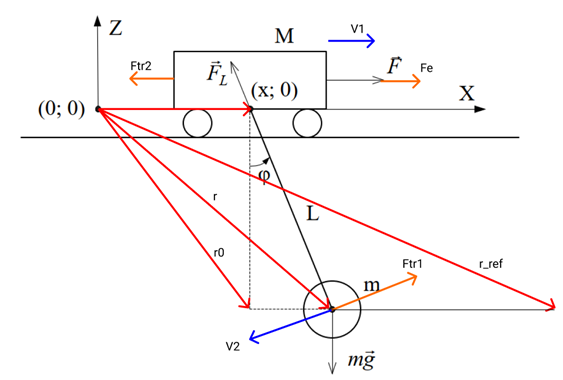

Простейшая модель крана представляет собой маятник на каретке.
Параметры модели: L — длина троса; M — масса тележки; m — масс; груза; φ — угол отклонения груза; x — расстояние от центра оси до точки подвеса груза;   — сила, создаваемая электроприводом, действующая на тележку;   — сила, действующая на трос с грузом со стороны электропри-вода подъема;  — радиус-векторы положения центра груза началь-ный, текущий, заданный соответственно;   — сила вязкого трения о воз-дух груза;  — сила вязкого трения о воздух каретки.


In [1]:
# Автоматизация расчета уравнения состояния объекта с помощью пакета sympy
import sympy,math

#создаем символьные переменные
m=sympy.symbols('m')
M=sympy.symbols('M')
g=sympy.symbols('g')
L=sympy.symbols('L')
k1=sympy.symbols('k1')
k2=sympy.symbols('k2')
ktrk=sympy.symbols('ktrk') #сила трения качения каретки
Fe=sympy.symbols('Fe')
x=sympy.symbols('x')
dx=sympy.symbols('dx')
phi=sympy.symbols('phi')
dphi=sympy.symbols('dphi')

ddx=sympy.symbols('ddx')
ddphi=sympy.symbols('ddphi')
#signdx=sympy.symbols('np.sign(dx)')

# полная кинетическая системы T
T = m*(dx**2+(L**2)*dphi**2+2*dx*L*dphi*sympy.cos(phi))/2+M*(dx**2)/2
#сила трения в месте крепления троса (консервативные силы для уравнения Лагранжа для первой степени свободы)
Mtr1=-k1*dphi
#сила трения каретки о воздух выраженная в абсолютном значении (консервативные силы)
Ftr2=-k2*dx
N=(M+m)*g # реакция опоры
Ftrk=-ktrk*N #сила трения качения
# полная потенциальная энергися системы V 
V = -m*g*L*sympy.cos(phi)
#задание функции Лагранжа
L = T - V
print("L=",L)
#правая часть 1-ого уравнения ЭЛ  или обобщенная сила
F1=Fe+Ftr2+Ftrk
F2=Mtr1
#Система уравнений Эйлера-Лагранжа 2 рода
dLddx=sympy.diff(L,dx)
print(dLddx)
L1=(sympy.diff(dLddx,x)*dx+sympy.diff(dLddx,dx)*ddx+sympy.diff(dLddx,phi)*dphi+sympy.diff(dLddx,dphi)*ddphi)-(sympy.diff(L,x))-F1 #L[0]=0
print("L1=",L1,"=0")
dLddphi=sympy.diff(L,dphi)
print("dL/d(dphi)=",dLddphi)
dLdphi=sympy.diff(L,phi)
print("dLdphi=",dLdphi)
ddLddphidt=(sympy.diff(dLddphi,x)*dx+sympy.diff(dLddphi,dx)*ddx+sympy.diff(dLddphi,phi)*dphi+sympy.diff(dLddphi,dphi)*ddphi)-F2
print("d( dL/d(dphi) )/dt=",ddLddphidt)
L2=ddLddphidt-dLdphi #L[1]=0
print("L2=",L2,"=0")
ddphi=sympy.solve(L2,ddphi)
print("ddphi=",ddphi,"\n")
ddx=sympy.solve(L1.subs('ddphi',ddphi[0]),ddx)
ddx = sympy.simplify(ddx[0])
ddphi=ddphi[0]
print("ddx=",ddx,"\n","ddphi=",ddphi)

L= L*g*m*cos(phi) + M*dx**2/2 + m*(L**2*dphi**2 + 2*L*dphi*dx*cos(phi) + dx**2)/2
M*dx + m*(2*L*dphi*cos(phi) + 2*dx)/2
L1= -Fe + L*ddphi*m*cos(phi) - L*dphi**2*m*sin(phi) + ddx*(M + m) + dx*k2 + g*ktrk*(M + m) =0
dL/d(dphi)= m*(2*L**2*dphi + 2*L*dx*cos(phi))/2
dLdphi= -L*dphi*dx*m*sin(phi) - L*g*m*sin(phi)
d( dL/d(dphi) )/dt= L**2*ddphi*m + L*ddx*m*cos(phi) - L*dphi*dx*m*sin(phi) + dphi*k1
L2= L**2*ddphi*m + L*ddx*m*cos(phi) + L*g*m*sin(phi) + dphi*k1 =0
ddphi= [-ddx*cos(phi)/L - g*sin(phi)/L - dphi*k1/(L**2*m)] 

ddx= (Fe*L + L**2*dphi**2*m*sin(phi) - L*M*g*ktrk - L*dx*k2 - L*g*ktrk*m + L*g*m*sin(2*phi)/2 + dphi*k1*cos(phi))/(L*(M + m*sin(phi)**2)) 
 ddphi= -ddx*cos(phi)/L - g*sin(phi)/L - dphi*k1/(L**2*m)


In [2]:
#парсер в нужный формат Latex
def pars_Tex(u_str):
    import string
    u_str=str(u_str.evalf(2))
    u_str=u_str.replace("**","^")
    u_str=u_str.replace("phi","\phi")
    u_str=u_str.replace("ddphi","\ddot{\phi}")
    u_str=u_str.replace("dphi","\dot{\phi}")
    u_str=u_str.replace("ddx","\ddot{x}")
    u_str=u_str.replace("dx","\dot{x}")
    u_str=u_str.replace("k1","k_1")
    u_str=u_str.replace("k_2","k_2")
    u_str=u_str.replace("Fe","F_e")
    print(u_str)

In [3]:
pars_Tex(ddx)

(F_e*L + L^2*d\phi^2*m*sin(\phi) - L*M*g*ktrk - L*\dot{x}*k2 - L*g*ktrk*m + 0.5*L*g*m*sin(2*\phi) + d\phi*k_1*cos(\phi))/(L*(M + m*sin(\phi)^2))


In [4]:
pars_Tex(ddphi)

-\ddot{x}*cos(\phi)/L - g*sin(\phi)/L - d\phi*k_1/(L^2*m)


\begin{cases} \ddot{x}=
(F_e*L + L^2*d\phi^2*m*sin(\phi) - L*M*g*ktrk*saturation(dx) - L*\dot{x}*k2 - L*g*ktrk*m + 0.5*L*g*m*sin(2*\phi) + d\phi*k_1*cos(\phi))/(L*(M + m*sin(\phi)^2))
 \\  \ddot{\phi}=
-\ddot{x}*cos(\phi)/L - g*sin(\phi)/L - d\phi*k_1/(L^2*m)
  \end{cases}

In [5]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 6.9MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=839363384bc0a771e3b0283a20e8fd8278b0f10477872a8fd8bebba4cf386aed
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [6]:
  !pip install -U control

     |████████████████████████████████| 348kB 7.6MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344929 sha256=0f410ed239690ee40f241feacc2093c280234a0787da2721faaf7c6f5dae16ac
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import control as ct
from control.matlab import * #I want to have a MATLAB-like environment
import matplotlib.pyplot as plt
import scipy as sp

In [8]:
#creating object dynamics
def port_crane_updfcn(t,s,u,params):
  """A port crane with a cargo on a rope dynamics (like object) 
  assumptions: by all perturbations such as the rolling friction
   force at the point of contact with the rails, air resistance,
    we also assume that the cable is inextensible, i.e. L=const

  Parameters
  ----------
  s: array 
      System state: [x,dx,phi,dphi], where x is a port crane (object) position
      in [0,200] [m], dx is velocity of the port crane in m/s, phi is an angle
      of deflection of the rope with a container, which is a cargo and attached
      to the end of the rope in rad, dphi is angular velocity of the rope 
      deflection in rad/sec

  u: array
      System inputs: [Fe], where Fe is a pulling force exerted on the
      trolley (cart), created by electric motor in Newton

  Returns 
  -------
  float
      [ddx,ddphi], where ddx is a port crane acceleration in m/s^2 and ddphi is 
      angular acceleration in rad/s^2
  """
  from math import sin,cos,sqrt,atan

  # Set up the system parameters
  m = params.get('m', 400.)  # cargo mass in kg
  M = params.get('M', 3000.) # port crane mass in kg
  g = params.get('g', 9.8)    # gravitational constant, m/s^2
  L = params.get('L', 30.)     # length of the drope in m
  k1 = params.get('k1', 8e4)    # static coefficient of  friction acting on the rope in 1/kg
  k2 = params.get('k2',1.5e3)     # static coefficient of friction acting on cargo, it's include viscous friction air and dry friction and other that depend on speed in 1/kg
  ktrk = params.get('ktrk',3e-1)  # coefficient for friction of the cart on the surface

  # Define variables for object state
  x = s[0]    # port crane position in m
  dx = s[1]   # velocity of the port crane in m/s
  phi = s[2]  # deflection of the rope angle in rad
  dphi = s[3] # angular velocity of the rope deflection in rad/sec

  #Define variables for object inputs
  Fe = u[0]   # pulling force exerted on the trolley in Newtons

  v_ktrkmax=2 # установка скорости в м/с, когда значение трени качения установится
  saturation=ct.saturation_nonlinearity(v_ktrkmax) # нелинейность для трения качения,
  ktrk = (ktrk/v_ktrkmax)*saturation(dx)

  # calculating the output variables
  ddx = (Fe*L + L**2*dphi**2*m*sin(phi) - L*M*g*ktrk - L*dx*k2 - L*g*ktrk*m + L*g*m*sin(2*phi)/2 + dphi*k1*cos(phi))/(L*(M + m*sin(phi)**2)) 
  ddphi =  -ddx*cos(phi)/L - g*sin(phi)/L - dphi*k1/(L**2*m)

  return np.array([dx,ddx,dphi,ddphi])

def port_crane_outfcn(t, s, u, params):
  return s[0:4]

In [9]:
# Define a generator for creating a plots
def system_dynamic_plot(sys, t, y, u, t_start_input=0, x_ref=0, linetype='b-',
                         subplots=[None, None, None],fig_size=None):
  #Figure out the plot bounds and indices
  x_min = 0; x_max = x_ref+math.ceil(x_ref*0.05); x_ind = sys.find_state('x')
  phi_min = -math.pi/18; phi_max = math.pi/18; phi_ind = sys.find_state('phi')
  Fe_min = 0; Fe_max = max(u); Fe_ind = sys.find_input('Fe') 

  #convert phi from rad to deg
  from math import pi 
  y[phi_ind]=y[phi_ind]*180/pi

  # Make sure the upper and lower bounds on x are OK
  while max(y[x_ind]) > x_max: x_max += 1
  while min(y[x_ind]) < x_min: x_min -= 1

  # Make sure the upper and lower bounds on phi are OK
  while max(y[phi_ind]) > phi_max: phi_max += 1
  while min(y[phi_ind]) < phi_min: phi_min -= 1
  phi_max+=1
  phi_min-=1

  # Make sure the upper and lower bounds on Fe are OK
  if len(u.shape)>1:
    while max(u[Fe_ind]) > Fe_max: Fe_max += 1
    while min(u[Fe_ind]) < Fe_min: Fe_min -= 1
  else:
    while max(u) > Fe_max: Fe_max += 1
    while min(u) < Fe_min: Fe_min -= 1
  Fe_max += Fe_max*0.1

  # Create arrays for return values
  subplot_axes = subplots.copy()

  # Position profile
  if subplot_axes[0] is None:
    subplot_axes[0] = plt.subplot(3,1,1)
  else:
    plt.sca(subplots[0])
  plt.plot(t, y[x_ind], linetype)
  plt.plot(t, x_ref*np.ones(t.shape), 'k-')
  plt.plot([t_start_input, t_start_input], [x_min, x_max], 'k--')
  plt.axis([0, t[-1], x_min, x_max])
  plt.xlabel('Time $t$ [s]')
  plt.ylabel('Port crane \nposition $x$')
  plt.grid(color='0.5')
  
  # Angle phi profile
  if subplot_axes[1] is None:
    subplot_axes[1] = plt.subplot(3,1,2)
  else:
    plt.sca(subplots[1])
  plt.plot(t, y[phi_ind], linetype)
  plt.plot([t_start_input, t_start_input], [phi_min, phi_max], 'k--')
  plt.axis([0, t[-1], phi_min, phi_max])
  plt.xlabel('Time $t$ [s]')
  plt.ylabel('deflection of the\n rope angle\n $\phi$ in $\circ$')
  plt.grid(color='0.5')

  # Pulling force
  if subplot_axes[2] is None:
    subplot_axes[2] = plt.subplot(3,1,3)
  else:
    plt.sca(subplots[2])
  if len(u.shape)>1:
    plt.plot(t, u[Fe_ind], linetype)
  else:
    plt.plot(t, u, linetype)
  plt.plot([t_start_input, t_start_input], [Fe_min, Fe_max], 'k--')
  plt.axis([0, t[-1], Fe_min, Fe_max])
  plt.xlabel('Time $t$ [s]')
  plt.ylabel('pulling force Fe,\n $Newton$')
  plt.grid(color='0.5')
  
  return subplot_axes

# State space fuzzy-controller

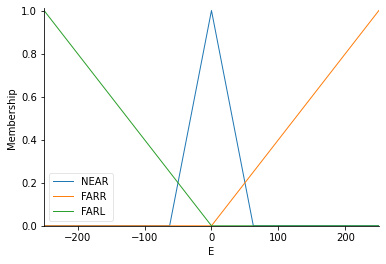

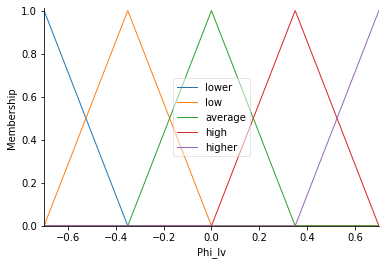

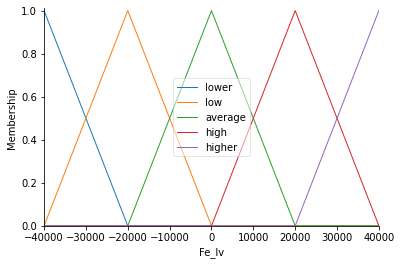

In [37]:
#Параметры моделирования системы
x_zad=250 # in m

#Сгенерировали нечёткую систему

#Fuzzy regulator parameters init
Fe_abs=4e4
Fe_min=-Fe_abs
Fe_max=Fe_abs

# New Antecedent/Consequent objects hold universe variables and
# continues membership functions
Nin=1000# count of point for input universe
Nout=1000 # count of point for output universe
E_delta=0.25 # coefficient of reflaction x coordinate from x_zad in x_zad percentage 
E = ctrl.Antecedent(np.linspace(-x_zad, x_zad, int(Nout+1)), 'E') # input in m with 
Phi_lv = ctrl.Antecedent(np.linspace(-40*math.pi/180, 40*math.pi/180, int(Nout+1)), 'Phi_lv') # in rad
Fe_lv = ctrl.Consequent(np.linspace(Fe_min, Fe_max, int(Nout+1)), 'Fe_lv')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
cuant = ['lower','low','average','high','higher']
cuantE = ['NEAR','FARR','FARL']
E[cuantE[0]] = fuzz.trimf(E.universe, [-E_delta*x_zad, 0, E_delta*x_zad])
E[cuantE[1]] = fuzz.trimf(E.universe, [0,x_zad,x_zad])
E[cuantE[2]] = fuzz.trimf(E.universe, [-x_zad,-x_zad,0])
# Auto-membership function population 
Phi_lv.automf(5,'cuant')
Fe_lv.automf(5,'cuant')

E.view()
Phi_lv.view()
Fe_lv.view()

#создание базы правил нечеткой системы
#Fuzzy rules
rule1 = ctrl.Rule(Phi_lv[cuant[0]] & E[cuantE[0]] , Fe_lv[cuant[4]])
rule2 = ctrl.Rule(Phi_lv[cuant[1]] & E[cuantE[0]], Fe_lv[cuant[3]])
rule3 = ctrl.Rule(Phi_lv[cuant[2]] & E[cuantE[0]], Fe_lv[cuant[2]])
rule4 = ctrl.Rule(Phi_lv[cuant[3]] & E[cuantE[0]], Fe_lv[cuant[1]])
rule5 = ctrl.Rule(Phi_lv[cuant[4]] & E[cuantE[0]], Fe_lv[cuant[0]])
rule6 = ctrl.Rule(E[cuantE[1]], Fe_lv[cuant[4]])
rule7 = ctrl.Rule(E[cuantE[2]], Fe_lv[cuant[0]])

#Control System Creation 
sys_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4 , rule5, rule6, rule7])
sys_sim = ctrl.ControlSystemSimulation(sys_ctrl)


In [11]:
#Input/ouput model for the object
sys_object = ct.NonlinearIOSystem(port_crane_updfcn, port_crane_outfcn, 
                   inputs = ('Fe'), outputs = None, states=('x','dx','phi','dphi'),
                   name='sys_object',params={})

In [58]:
#file iosys.py

# controlsystem
'''
def _rhs(self, t, x, u, params={}):
  NotImplemented("Evaluation not implemented for system of type ",
                  type(self))
  

      * _rhs(t, x, u): compute the right hand side of the differential or
      difference equation for the system.  This must be specified by the
      subclass for the system.
    * _out(t, x, u): compute the output for the current state of the system.
      The default is to return the entire system state.

    def linearize(self, x0, u0, t=0, params={}, eps=1e-6,
                  name=None, copy=False, **kwargs):
        """Linearize an input/output system at a given state and input.
        Return the linearization of an input/output system at a given state
        and input value as a StateSpace system.  See
        :func:`~control.linearize` for complete documentation.
        """
        #
        # If the linearization is not defined by the subclass, perform a
        # numerical linearization use the `_rhs()` and `_out()` member
        # functions.
      
'''
'''
#realise
def _rhs(self, t, x, u):
  # Convert input to column vector and then change output to 1D array
  xdot = np.dot(self.A, np.reshape(x, (-1, 1))) \
      + np.dot(self.B, np.reshape(u, (-1, 1)))
  return np.array(xdot).reshape((-1,))

def _out(self, t, x, u):
  # Convert input to column vector and then change output to 1D array
  y = np.dot(self.C, np.reshape(x, (-1, 1))) \
      + np.dot(self.D, np.reshape(u, (-1, 1)))
  return np.array(y).reshape((-1,))

def dynamics(self, t, x, u):
  return self._rhs(t, x, u)
        
  
def _out(self, t, x, u, params={}):
  return x



'''
#nonlinearsystem

def _rhs(self, t, x, u):
    xdot = self.updfcn(t, x, u, self._current_params) \
        if self.updfcn is not None else []
    return np.array(xdot).reshape((-1,))

def _out(self, t, x, u):
    y = self.outfcn(t, x, u, self._current_params) \
        if self.outfcn is not None else x
    return np.array(y).reshape((-1,))

#input_output_response

def _check_convert_array(in_obj, legal_shapes, err_msg_start, squeeze=False,
                         transpose=False):
  # convert nearly everything to an array.
    out_array = np.asarray(in_obj)
    if (transpose):
        out_array = np.transpose(out_array)

    # Test element data type, elements must be numbers
    legal_kinds = set(("i", "f", "c"))  # integer, float, complex
    if out_array.dtype.kind not in legal_kinds:
        err_msg = "Wrong element data type: '{d}'. Array elements " \
                  "must be numbers.".format(d=str(out_array.dtype))
        raise TypeError(err_msg_start + err_msg)

    # If array is zero dimensional (in_obj is scalar):
    # create array with legal shape filled with the original value.
    if out_array.ndim == 0:
        for s_legal in legal_shapes:
            # search for shape that does not contain the special symbol any.
            if "any" in s_legal:
                continue
            the_val = out_array[()]
            out_array = np.empty(s_legal, 'd')
            out_array.fill(the_val)
            break

    # Test shape
    def shape_matches(s_legal, s_actual):
        """Test if two shape tuples match"""
        # Array must have required number of dimensions
        if len(s_legal) != len(s_actual):
            return False
        # All dimensions must contain required number of elements. Joker: "all"
        for n_legal, n_actual in zip(s_legal, s_actual):
            if n_legal == "any":
                continue
            if n_legal != n_actual:
                return False
        return True

    # Iterate over legal shapes, and see if any matches out_array's shape.
    for s_legal in legal_shapes:
        if shape_matches(s_legal, out_array.shape):
            break
    else:
        legal_shape_str = " or ".join([str(s) for s in legal_shapes])
        err_msg = "Wrong shape (rows, columns): {a}. Expected: {e}." \
                  .format(e=legal_shape_str, a=str(out_array.shape))
        raise ValueError(err_msg_start + err_msg)

    # Convert shape
    if squeeze:
        out_array = np.squeeze(out_array)
        # We don't want zero dimensional arrays
        if out_array.shape == tuple():
            out_array = out_array.reshape((1,))

    return out_array

def _update_params(self, params, warning=False):
  # Update the current parameter values
  self._current_params = self.params.copy()
  self._current_params.update(params)

def _find_size(sysval, vecval):
    """Utility function to find the size of a system parameter
    If both parameters are not None, they must be consistent.
    """
    if hasattr(vecval, '__len__'):
        if sysval is not None and sysval != len(vecval):
            raise ValueError("Inconsistend information to determine size "
                             "of system component")
        return len(vecval)
    # None or 0, which is a valid value for "a (sysval, ) vector of zeros".
    if not vecval:
        return 0 if sysval is None else sysval
    elif sysval == 1:
        # (1, scalar) is also a valid combination from legacy code
        return 1
    raise ValueError("Can't determine size of system component.")

def _process_time_response(
        sys, yout, xout, transpose=None, return_x=False,
        squeeze=None, input=None, output=None):
      # If squeeze was not specified, figure out the default (might remain None)
    if squeeze is None:
        squeeze = config.defaults['control.squeeze_time_response']

    # Determine if the system is SISO
    issiso = sys.issiso() or (input is not None and output is not None)

    # Figure out whether and how to squeeze output data
    if squeeze is True:         # squeeze all dimensions
        yout = np.squeeze(yout)
    elif squeeze is False:      # squeeze no dimensions
        pass
    elif squeeze is None:       # squeeze signals if SISO
        if issiso:
            if len(yout.shape) == 3:
                yout = yout[0][0]       # remove input and output
            else:
                yout = yout[0]          # remove input
    else:
        raise ValueError("unknown squeeze value")

    # Figure out whether and how to squeeze the state data
    if issiso and xout is not None and len(xout.shape) > 2:
        xout = xout[:, 0, :]            # remove input

    # See if we need to transpose the data back into MATLAB form
    if transpose:
        # Transpose time vector in case we are using np.matrix
        tout = np.transpose(tout)

        # For signals, put the last index (time) into the first slot
        yout = np.transpose(yout, np.roll(range(yout.ndim), 1))
        if xout is not None:
            xout = np.transpose(xout, np.roll(range(xout.ndim), 1))

    # Return time, output, and (optionally) state
    return (yout, xout) if return_x else (yout)

def input_output_response(
        sys, T, x_zad=0., X0=0, params={},
        transpose=False, return_x=False, squeeze=None,Fuzzy_regulator=None,
        solve_ivp_kwargs={}, **kwargs):
  """Compute the output response of a system to a given input.'''
  """

  # Set the default method to 'RK45'
  if solve_ivp_kwargs.get('method', None) is None:
    solve_ivp_kwargs['method'] = 'RK45'

  # Compute the time interval and number of steps
  T0, Tf = T[0], T[-1]
  n_steps = len(T)  
  print("n",n_steps)
  # Update the parameter values
  sys._update_params(params)
  global j
  j=0
  def ufun(t):
    global j
    A=sys_sim.output['Fe_lv']
    j+=1
    print(j)
    return [A]
    # Create a lambda function for the right hand side
  def ivp_rhs(t, x):
    return sys._rhs(t, x, ufun(t))

  if not hasattr(sp.integrate, 'solve_ivp'):
    raise NameError("scipy.integrate.solve_ivp not found; "
                        "use SciPy 1.0 or greater")
  soln = sp.integrate.solve_ivp(
      ivp_rhs, (T0, Tf), X0, t_eval=T,
      vectorized=False, **solve_ivp_kwargs)

  # Compute the output associated with the state (and use sys.out to
  # figure out the number of outputs just in case it wasn't specified)
  y = np.zeros((np.shape(sys._out(T[0], X0, x_zad))[0], len(T)))
  u = np.zeros((len(T)))
  y[:,0]=X0
  u = np.zeros((len(T)))  
  j=0
  for i in range(len(T)):
    if i>0:
      sys_sim.input['E'] = x_zad[i]-y[0, i-1] #ошибка по координате
      sys_sim.input['Phi_lv'] = y[2, i-1]  #ошибка по углу отклонения
    else:
      sys_sim.input['E'] = x_zad[i]-y[0, i] #ошибка по координате
      sys_sim.input['Phi_lv'] = y[2, i]  #ошибка по углу отклонения 
    sys_sim.compute()
    j+=1
    print(j)
    
    #u[i]=sys_sim.output['Fe_lv']
    #print(u[i])
    #U=u[i]
    y[:, i] = sys._out(T[i], soln.y[:, i], [4e4] )
    #sys_state=np.append( sys_state, 
                        
  return _process_time_response(sys, y, soln.y, transpose=transpose,
                                  return_x=return_x, squeeze=squeeze)



n 1001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
1

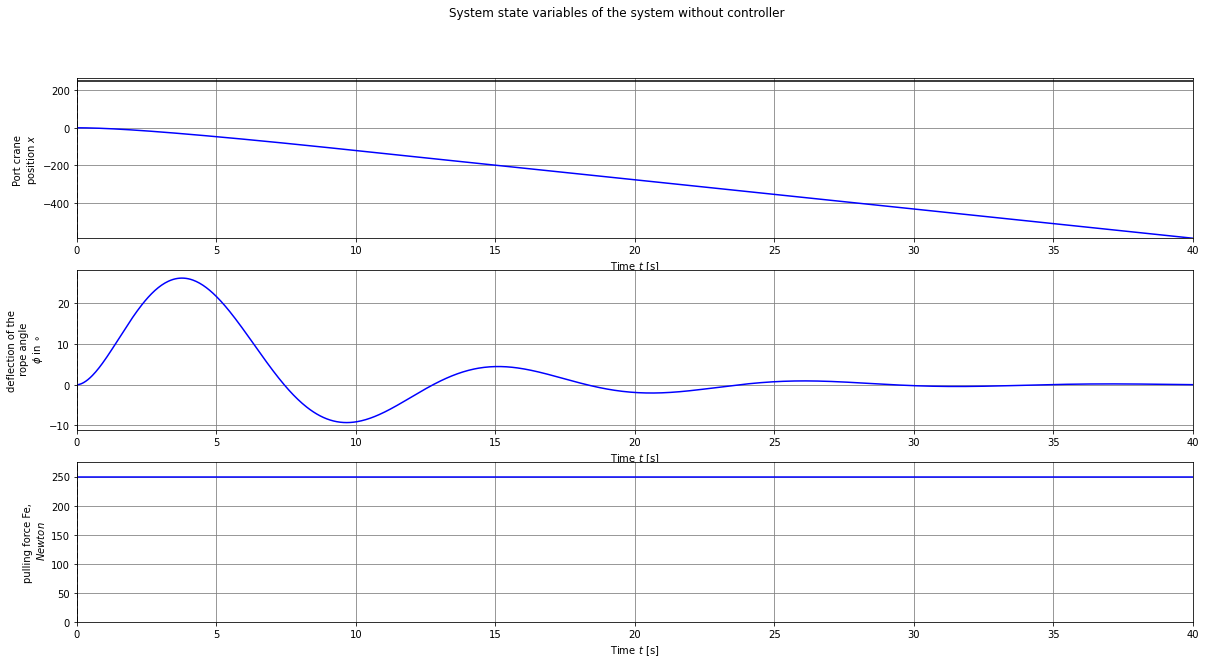

In [59]:
# Define the generator for simulating an system with Fuzzy-controller

# Define the time and input vectors
time_start_force=0
T_N=int(1e3+1) #points for simulation
time_interval_stop = 40 # length of time interval in sec 
time_application_of_force = 10

T = np.linspace(0, time_interval_stop, (T_N))
N_time_start_force = math.ceil((time_start_force/time_interval_stop)*(T_N))
#x_zad=np.concatenate( ( np.zeros(N_time_start_force), np.ones(T_N-N_time_start_force) ) )
#Fe = np.array([0])
N_time_application_of_force = math.ceil((time_application_of_force/time_interval_stop)*(T_N))
x_zad_en = x_zad*np.ones(T_N)

sys_state = np.array([[0],[0],[0],[0]]) 
sys_state = input_output_response(sys_object, T, x_zad_en, sys_state[0:4,0],params={},Fuzzy_regulator=sys_sim)
'''
sys_state = np.array([[0],[0],[0],[0]]) # array for state variables of the object size=(4,TN+1) =[x,dx,phi,dphi]^T where dx ... ddphi are vectors
temporary_state = np.array([[0],[0],[0],[0]])

i=0
for i in range(len(T)-1):
    #sys_sim.input['E'] = x_zad-sys_state[0,i]
    #sys_sim.input['Phi_lv'] = sys_state[2,i]
    #sys_sim.compute()

    #Fe=np.append( Fe ,   sys_sim.output['Fe_lv']  )
    #Fe=np.append( Fe , [1e3] )
    #if i==0:
    #temporary_state = np.array(  [ (sys_object.output(T[i], sys_object.dynamics(T[i], sys_state[0:4,i], [Fe[i]]) , [Fe[i]])) ]  ).T
    #else:    
    
    def ufun(t):
      # Find the value of the index using linear interpolation
      idx = np.searchsorted(T, t, side='left')
      if idx == 0:
          # For consistency in return type, multiple by a float
          return U[..., 0] * 1.
      else:
          dtk = (t - T[idx-1]) / (T[idx] - T[idx-1])
          return U[..., idx-1] * (1. - dtk) + U[..., idx] * dtke    

    if i==0:
      temporary_state = np.array(  [ dt*(sys_object.dynamics(T[i], sys_state[0:4,i], [Fe[i]])) ]  ).T
    else:
      temporary_state = np.array(  [ dt*(sys_object.dynamics(T[i], sys_state[0:4,i], [Fe[i]])) ]  + sys_state[0:4,i-1] ).T
    
    #temporary_state = np.array(  [ (sys_object._rhs(T[i], sys_state[0:4,i], [Fe[i]])) ]  ).T
    sys_state=np.append( sys_state,   temporary_state  , axis=1)
    '''
    
#create graphics
figsize=(20,10)
plt.figure(figsize=figsize)  
subplots = system_dynamic_plot(sys_object, T, sys_state, u=x_zad_en,x_ref=x_zad,
         t_start_input=time_start_force, linetype='-b',fig_size=figsize)

# Add title and legend
plt.suptitle('System state variables of the system without controller')
import matplotlib.lines as mlines
pi_line = mlines.Line2D([], [], color='blue', linestyle='-', label='without controller')

In [44]:
sys_sim.input['E'] = 0  #ошибка по координате
sys_sim.input['Phi_lv'] =0.2  #ошибка по углу отклонения 
sys_sim.compute()

u=sys_sim.output['Fe_lv'] 
print(u)

-11172.313669208437


In [ ]:
print((Fe.size),"-----",(T.size))

1001 ----- 1001


In [ ]:
print(y)

NameError: ignored

In [ ]:
print([  sys_sim.output['Fe_lv']  ])

[4166.666666666665]


In [67]:
print(sys_state)

[[0]
 [0]
 [0]
 [0]]


In [ ]:
print(sys_object.dynamics(t, sys_state[0:4,sys_state.shape[1]-3:sys_state.shape[1]-1], [Fe[Fe.size-3:Fe.size-1]]))

TypeError: ignored

In [ ]:
print(sys_state)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(t)
print(((t/T)*(len(T)-1)))

0.0
[nan  0.  0. ...  0.  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
#emporary_state = np.array([[0],[0],[8],[0]])
print(temporary_state)

[0 0 0 0]


In [ ]:
a=np.array([5])
a=np.append(a,3)
print(a)
a=np.append(a,8)
print(a[2])

[5 3]
8


In [ ]:
a=np.array([[3 ,4 ,5],[4,6,8]])
print(a[0:2,1])
print(a[:end])
print(len(a))

[4 6]


NameError: ignored

In [ ]:

print(ddx[0].evalf(subs={ 'x':3,'dx':2,'phi':2,'dphi':2,'m':230,'M':6000,'k1':0,'k2':0,'g':9.8,'L':30,'Fe':800 }))

2.14258499040039


In [ ]:
type(a)

sympy.core.add.Add

In [ ]:
def port_crane_outdcn(t ,x ,u , param={})
  # Get the port crane parameters that we need
  